# Klasifikasi Dataset CIFAR 10 (Model CNN)

Contoh Deloyment untuk Domain Computer Vision (CV) <br>
Orbit Future Academy - AI Mastery - KM Batch 3 <br>
Tim Deployment dan Tim CV<br>
2022

## Modules dan Packages

In [3]:
#import the libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg
import seaborn as sns
import random
import zipfile
import pathlib
import ssl
from keras.datasets import cifar10

## Import Data

In [4]:
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 50s 0us/step


In [6]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

## Exploratory Data Analysis (EDA)

In [7]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


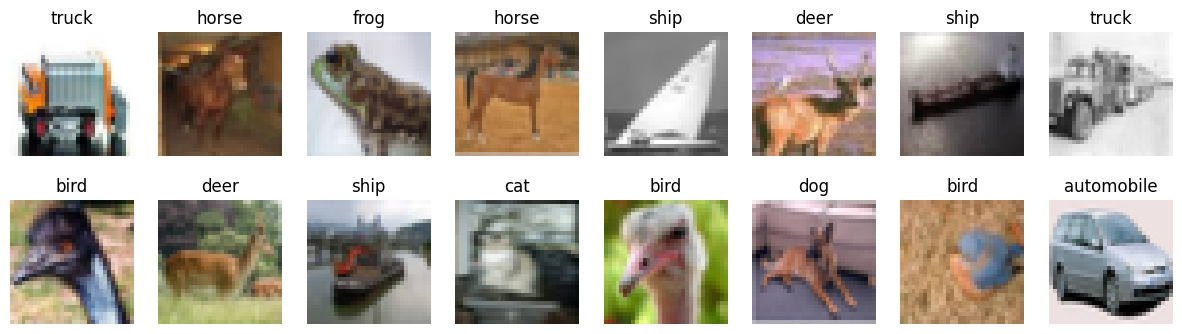

In [8]:
# Menampilkan Gambar pada Dataset Latih
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

## Menyiapkan Data

Kita akan melakukan normalisasi data input seperti berikut : $$x_{norm} = \frac{x}{255} - 0.5$$

Kita perlu melakukan konversi label kelas menjadi one-hot encoded vectors. Silahkan gunakan __keras.utils.to_categorical__.

In [10]:
# Normalisasi Input
x_train2 = (x_train / 255) - 0.5
x_test2  = (x_test / 255) - 0.5

# Mengkonversi Label Class menjadi One-Hot Encoded
y_train2 = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2  = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

## Membuat Arsitektur Model CNN 

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [16]:
def make_model():
    #define the convnet
    model = Sequential()
    
    # CONV => RELU => CONV => RELU => POOL => DROPOUT
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # CONV => RELU => CONV => RELU => POOL => DROPOUT
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # FLATTERN => DENSE => RELU => DROPOUT
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    # a softmax classifier
    model.add(Dense(NUM_CLASSES))
    model.add(Activation('softmax'))
    
    return model

In [12]:
def make_model():
    model = Sequential()
    model.add(Conv2D(16, 3, input_shape=(32, 32, 3), activation='relu', padding='same'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [17]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

# Train model

In [21]:
INIT_LR    = 5e-3  
BATCH_SIZE = 32
EPOCHS     = 20

model = make_model() 

model.compile(
    loss      = 'categorical_crossentropy', 
    optimizer = tf.keras.optimizers.Adamax(learning_rate=INIT_LR), 
    metrics   = ['accuracy'] 
)

In [22]:
model.fit(
    x_train2,
    y_train2,  
    batch_size      = BATCH_SIZE,
    epochs          = EPOCHS,
    validation_data = (x_test2, y_test2),
    shuffle         = True,
    verbose         = 1,
)

Epoch 1/20
1563/1563 [==============================] - 246s 155ms/step - loss: 1.5777 - accuracy: 0.4216 - val_loss: 1.1956 - val_accuracy: 0.5709
Epoch 2/20
1563/1563 [==============================] - 227s 145ms/step - loss: 1.1782 - accuracy: 0.5801 - val_loss: 0.9762 - val_accuracy: 0.6543
Epoch 3/20
1563/1563 [==============================] - 227s 145ms/step - loss: 0.9975 - accuracy: 0.6504 - val_loss: 0.8382 - val_accuracy: 0.7102
Epoch 4/20
1563/1563 [==============================] - 220s 141ms/step - loss: 0.8940 - accuracy: 0.6855 - val_loss: 0.7849 - val_accuracy: 0.7234
Epoch 5/20
1563/1563 [==============================] - 221s 141ms/step - loss: 0.8204 - accuracy: 0.7135 - val_loss: 0.7367 - val_accuracy: 0.7445
Epoch 6/20
1563/1563 [==============================] - 242s 155ms/step - loss: 0.7682 - accuracy: 0.7308 - val_loss: 0.7118 - val_accuracy: 0.7542
Epoch 7/20
1563/1563 [==============================] - 222s 142ms/step - loss: 0.7245 - accuracy: 0.7462 - val_

## Prediksi

In [24]:
# Prediksi untuk Data Latih
y_pred_train            = model.predict(x_train2)
y_pred_train_classes    = np.argmax(y_pred_train, axis=1)
y_pred_train_max_probas = np.max(y_pred_train, axis=1)

1563/1563 [==============================] - 25s 16ms/step


In [25]:
# Prediksi untuk Data Uji
y_pred_test            = model.predict(x_test2)
y_pred_test_classes    = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

313/313 [==============================] - 5s 17ms/step


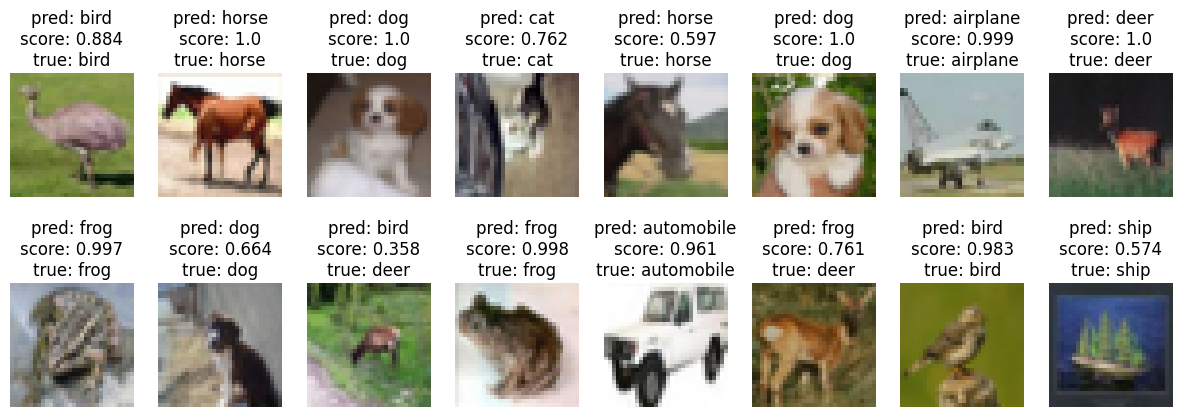

In [26]:
# Menampilkan Hasil Prediksi untuk Data Latih
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        pred_label = cifar10_classes[y_pred_train_classes[random_index]]
        pred_proba = y_pred_train_max_probas[random_index]
        true_label = cifar10_classes[y_train[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

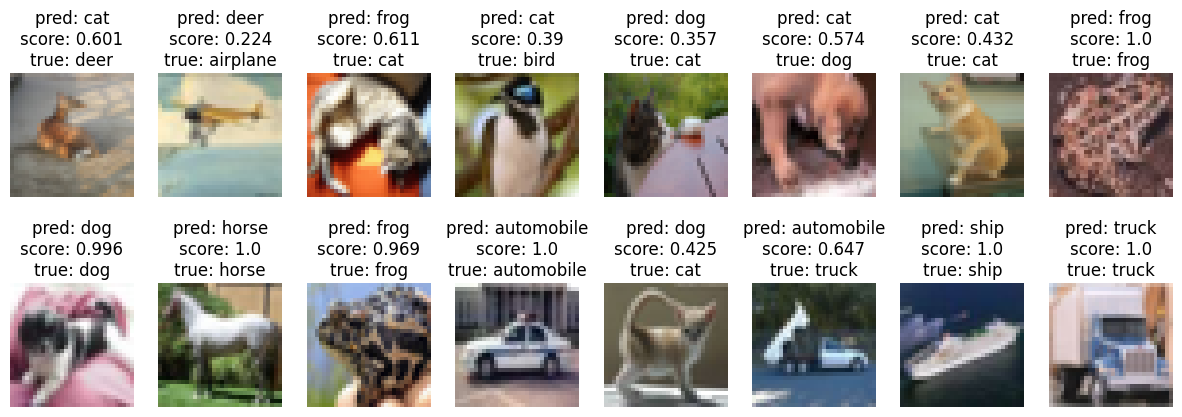

In [27]:
# Menampilkan Hasil Prediksi untuk Data Uji
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

## Evaluate model

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

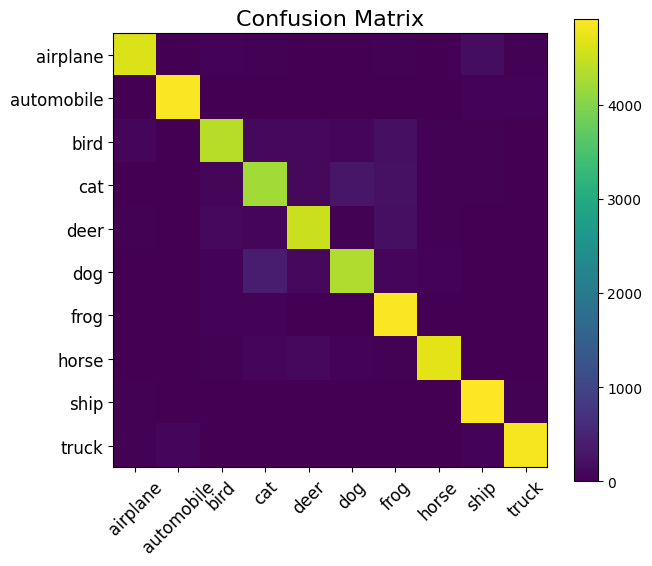

Train Accuracy: 0.92582


In [30]:
# Confusion Matrix dan Akurasi untuk Data Latih
plt.figure(figsize=(7, 6))
plt.title('Confusion Matrix', fontsize=16)
plt.imshow(confusion_matrix(y_train, y_pred_train_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

print("Train Accuracy:", accuracy_score(y_train, y_pred_train_classes))

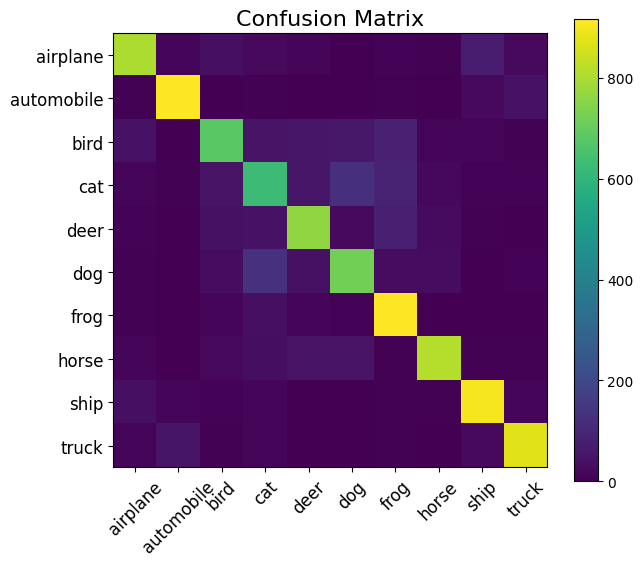

Test Accuracy: 0.8024


In [31]:
# Confusion Matrix dan Akurasi untuk Data Uji
plt.figure(figsize=(7, 6))
plt.title('Confusion Matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

print("Test Accuracy:", accuracy_score(y_test, y_pred_test_classes))

## Menyimpan Model

In [32]:
model.save_weights("model_cifar10_cnn1_tf.h5")